In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
from datetime import datetime
pd.options.plotting.backend = "plotly"
%matplotlib inline

# **요약**
- **목적**
    - 금융 데이터 분류 이해
    - 비정형 데이터 정형화 방법 습득
    - 원시 데이터에서 의미 있는 피쳐 추출
- **핵심**
    - 사람이 만든 데이터에는 오류가 포함될 가능성 다분
        - 인간이 산출하는 **지표, 지수**     
        - 인간이 주체가 되어 생성하는 **사회과학 데이터**
        - 심지어 인간이 측정하는 **자연과학 데이터**
    - 데이터를 다루기 위해서는 해당 오류를 식별할 수 있는 식견을 갖춰야 함
- **중요 지표**
    - 좋은 통계적 특징
        - **정규성**, 정상성, 높은 SNR 
            - 이 중 정규성은 포트폴리오 이론, CAPM, 효율적 시장 가설, 옵션 가격 결정 모형 등의 기본 가정
                - 그러나 price data는 정규성을 보이지 않음
                - 가정이 무너지면 결론 또한 위협
    - 계산 용이성

## Bars
- 정의
    - 테이블 : 정보가 추출되어 테이블 형태로 표현된 데이터
    - Bars : 해당 테이블의 각 행
- 특징
    - 대부분 알고리즘의 입력 형식
    - RDB 혁식으로 관리 가능
- 분류
    - Standard Bars
        - 정의
            - 비균질 데이터를 균질 계열화한 Bars
        - 종류
            - Time Bars
            - Tick Bars
            - Volume Bars
            - Dollar Bars
    - Information-Driven Bars

# Standard Bar
## Raw Data
- 20200229부터 20200528까지 삼성전자 tick 데이터

In [2]:
def read_all_csv(path, col_name):
    df = pd.DataFrame([])
    files = [f for f in listdir(path) if isfile(join(path, f))]
    for file in files:
        data = pd.read_csv(path + "/"+file, names = col_name)
        df = pd.concat([df, data], axis = 0)
    df = preprocess_df(df)
    return df
def fill_num(series, num):
    return series.astype(str).str.zfill(num)
def get_log_pct(close):
    return np.log1p(close.pct_change())
def preprocess_df(data):
    data = data[data.체결시각 != 31000000]
    data.일자     = data.일자.astype(str)
    data.종목코드 = fill_num(data.종목코드, 6)
    data.체결시각 = fill_num(data.체결시각, 8)
    data["거래대금"] = data["현재가"].mul(data["체결수량"])
    data.index = pd.to_datetime(data.일자 + data.체결시각, format="%Y%m%d%H%M%S%f")
    data.index.name = "시각"    
    data = data[data.columns.difference(["일자", "체결시각"])]
    return data[reversed(data.columns)]

(체결된)원 데이터의 경우 거래가 체결될 때마다 row가 쌓이는 형태

In [3]:
col_name = ["일자", "종목코드", "체결시각", "체결수량", "현재가", "매도최우선호가", "매수최우선호가" ,"매도최우선호가잔량", "매수최우선호가잔량", 
            "매도10단계호가잔량합", "매수10단계호가잔량합", "매도성향체결수량", "매수성향체결수량"]
path = "./samsung_20200229_20200528"
data = read_all_csv(path, col_name)
data.head()

,현재가,체결수량,종목코드,매수최우선호가잔량,매수최우선호가,매수성향체결수량,매수10단계호가잔량합,매도최우선호가잔량,매도최우선호가,매도성향체결수량,매도10단계호가잔량합,거래대금
시각,,,,,,,,,,,,
2020-03-02 09:00:06,54300,1347890,005930,94251,54300,0,447981,12872,54400,0,101146,73190427000
2020-03-02 09:00:06,54400,1000,005930,94251,54300,1000,447981,12872,54400,0,101146,54400000
2020-03-02 09:00:06,54400,5000,005930,94251,54300,5000,447981,12872,54400,0,101146,272000000
2020-03-02 09:00:06,54400,10,005930,94251,54300,10,447981,12872,54400,0,101146,544000
2020-03-02 09:00:06,54400,200,005930,94251,54300,200,447981,12872,54400,0,101146,10880000


In [4]:
data.tail()

,현재가,체결수량,종목코드,매수최우선호가잔량,매수최우선호가,매수성향체결수량,매수10단계호가잔량합,매도최우선호가잔량,매도최우선호가,매도성향체결수량,매도10단계호가잔량합,거래대금
시각,,,,,,,,,,,,
2020-05-27 15:19:58,49800,1,005930,187044,49800,0,787000,709,49850,1,3669488,49800
2020-05-27 15:19:58,49800,4,005930,187040,49800,0,786996,709,49850,4,3669376,199200
2020-05-27 15:19:58,49850,1,005930,187036,49800,1,786992,917,49850,0,3669374,49850
2020-05-27 15:19:59,49850,600,005930,187046,49800,600,787012,1154,49850,0,3669487,29910000
2020-05-27 15:30:01,49900,964597,005930,18609,49850,0,81961,318482,49900,0,1966420,48133390300


## Time Bar
- 정의
    - 설정한 시간 단위 샘플링
- 특징
    - 우리가 일반적으로 보는 데이터
- 유의점
    - 오버 샘플링 및 언더 샘플링 가능성
        - 시장에서 거래는 시간에 따라 동질적이지 않음
            - 장 개장 직후, 장 마감 전
        - 좋지 않은 통계적 성질 보유
            - 계열 상관성, 이분산성, 수익률의 비정규분포성 등의 문제 발생

In [5]:
def time_bar(df, time):
    resample = df.resample(time)
    # pandas의 경우 퀀트가 개발하였기 때문에, 금융 분석에 유용한 기능이 많음(ohlc)
    bars = resample["현재가"].ohlc()
    bars.ffill(inplace = True)
    bars[["volume", "value"]] = resample[["체결수량", "거래대금"]].sum()
    return bars

In [6]:
data_3m = time_bar(data, "3T")
data_3m.index.name = "3m Time Bar"
data_3m

,open,high,low,close,volume,value
3m Time Bar,,,,,,
2020-03-02 09:00:00,54300.0,54800.0,54300.0,54600.0,2327838,126693278900
2020-03-02 09:03:00,54600.0,54700.0,54400.0,54600.0,594563,32435575900
2020-03-02 09:06:00,54600.0,54600.0,54500.0,54600.0,228611,12471629300
2020-03-02 09:09:00,54600.0,54600.0,54400.0,54500.0,336941,18371621100
2020-03-02 09:12:00,54400.0,54500.0,54200.0,54300.0,398559,21647364900
...,...,...,...,...,...,...
2020-05-27 15:18:00,49900.0,49900.0,49800.0,49850.0,121895,6077035550
2020-05-27 15:21:00,49900.0,49900.0,49800.0,49850.0,0,0
2020-05-27 15:24:00,49900.0,49900.0,49800.0,49850.0,0,0


## Tick Bar
- 정의
    - 설정한 거래 건수 단위 샘플링
- 특징
    - Time Bars보다 나은 통계적 성질
        - IID Normal Distribution에 보다 근접함
            - On the Distribution of Stock Price Differences(MAndelbrot, 1967)
- 유의점
    - 이상치
        - 동시호가에 강건하지 못함

In [7]:
def tick_bar(df, tick_size):
    df = df.reset_index()
    df["tick_num"] = np.arange(len(df)) // tick_size
    groupby = df.groupby("tick_num")
    bars = groupby["현재가"].ohlc()
    bars[["volume", "value"]] = groupby[["체결수량", "거래대금"]].sum()
    bars["시각"] = groupby["시각"].first()
    bars.set_index("시각", inplace = True)
    return bars

In [8]:
tick_150 = tick_bar(data, 150) #150은 3분봉과 데이터 수를 맞추기 위해 임의로 설정
tick_150

,open,high,low,close,volume,value
시각,,,,,,
2020-03-02 09:00:06,54300,54500,54300,54500,1431157,77726531200
2020-03-02 09:00:12,54500,54600,54400,54500,75427,4110606200
2020-03-02 09:00:16,54500,54600,54400,54600,23072,1257024000
2020-03-02 09:00:22,54600,54700,54500,54700,79155,4318471200
2020-03-02 09:00:28,54700,54700,54600,54700,33557,1833088800
...,...,...,...,...,...,...
2020-05-27 15:17:54,49850,49900,49850,49900,14782,737071400
2020-05-27 15:18:23,49850,49900,49850,49850,26704,1331436450
2020-05-27 15:18:49,49850,49900,49800,49850,47264,2356242600


## Volume Bar
- 정의
    - 설정한 거래량 단위 샘플링
- 특징
    - Tick Bars는 같은 거래량의 거래도 분할 횟수에 따라 다르게 처리
        - 주문량이 10일 경우 10개 1회 거래와 1개 10회 거래 차이
    - Tick Bars보다 더 좋은 통계적 성질
        - IID 정규분포에 근접한 수익률
        - A Subordinated stochastic process model with finite variance for speculative price(Clark, 1973)

In [9]:
def volume_bar(df, volume_size):
    df = df.reset_index()
    
    df["volume_num"] = df["체결수량"].cumsum() // volume_size
    groupby = df.groupby("volume_num")
    
    bars = groupby["현재가"].ohlc()
    bars[["volume", "value"]] = groupby[["체결수량", "거래대금"]].sum()
    bars["시각"] = groupby["시각"].first()
    bars.set_index("시각", inplace = True)
    return bars    

In [10]:
vol_30000 = volume_bar(data, 300_00)
vol_30000

,open,high,low,close,volume,value
시각,,,,,,
2020-03-02 09:00:06,54300,54400,54300,54400,1348890,73244827000
2020-03-02 09:00:06,54400,54500,54300,54500,23978,1305075100
2020-03-02 09:00:07,54500,54500,54400,54500,37131,2023549300
2020-03-02 09:00:11,54500,54500,54400,54500,29738,1620671800
2020-03-02 09:00:13,54500,54500,54400,54500,29901,1629401000
...,...,...,...,...,...,...
2020-05-27 15:18:32,49850,49900,49850,49850,29070,1449323300
2020-05-27 15:18:55,49850,49900,49850,49850,32144,1602467050
2020-05-27 15:19:08,49850,49900,49800,49850,26274,1309803700


## Dollar Bar
- 정의
    - 설정한 거래대금 단위 샘플링
- 특징
    - 가격 변동이 심할 경우 이전 기준들보다 동질적인 정보 제공
    - 액면분할, 병합 등 주식 조정시에도 틱 및 거래량에 비해 강건함

In [11]:
def value_bar(df, value_size):
    df = df.reset_index()
    
    df["value_num"] = df["거래대금"].cumsum() // value_size
    groupby = df.groupby("value_num")
    
    bars = groupby["현재가"].ohlc()
    bars[["volume", "value"]] = groupby[["체결수량", "거래대금"]].sum()
    bars["시각"] = groupby["시각"].first()
    bars.set_index("시각", inplace = True)
    return bars    

In [12]:
val_1500 = value_bar(data, 1_500_000_000)
val_1500

,open,high,low,close,volume,value
시각,,,,,,
2020-03-02 09:00:06,54300,54400,54300,54400,1348890,73244827000
2020-03-02 09:00:06,54400,54500,54300,54500,32187,1752465600
2020-03-02 09:00:07,54500,54500,54400,54500,27460,1496479800
2020-03-02 09:00:11,54500,54500,54400,54500,23005,1253741300
2020-03-02 09:00:13,54500,54500,54400,54500,32113,1750121600
...,...,...,...,...,...,...
2020-05-27 15:18:06,49850,49900,49850,49850,26130,1302907250
2020-05-27 15:18:48,49850,49900,49850,49850,34297,1709796850
2020-05-27 15:19:00,49850,49900,49800,49850,27409,1366348150


# Information-Driven Bar
- 정의
    - 시장에 새로운 정보가 유입되었을 때 더 많은 Bar 생성
- 용어
    - 정보
        - 거래량의 불균형이 정보를 반영한다는 가정
- 종류
    - **Tick** *Imbalance Bars*
    - **Volume/Dollar** *Imbalance Bars*
    - **Tick** *Run Bars*
    - **Volume/Dollar** *Run Bars*
- 틱 규칙
    - 수식
        - $b_t = b_{t-1}\ \ \  if \Delta p_t$
        - $b_t = {|\Delta p_t| \over \Delta p_t} \ \ \  if \Delta p_t \ne 0$
    - 시장가 매수 주문시 1
    - 시장가 매도 주문시 -1
    - 변동 없을 경우 이전 bar 따름

## 매수 매도 세력 불균형
- signed tick
    - 의미
        - aggressor side
            - 지정가 매도 + 시장가 매수
            - 지정가 매수 + 시장가 매도
        - 시장가 매수 : 1
        - 시장가 매도 : -1
    - 수식
        - $b_t$ = 1 if $p_{t+1} - p_t$ > 0 else -1 if $p_{t+1} - p_t$ < 0 else $b_{t-1}$
    - 

In [19]:
def signed_tick(df, initial_value = 1.0):
    diff = df["현재가"] - df["현재가"].shift(1)
    return (abs(diff) / diff).ffill().fillna(initial_value)

In [20]:
data["틱신호"] = signed_tick(data)

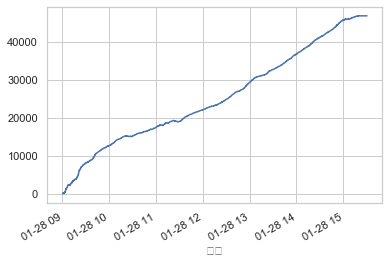

In [21]:
data.틱신호.cumsum().plot()

In [22]:
data["tick_imbalance"] = data["틱신호"].cumsum()

- ### Tick Imbalance($\theta_T$)
    - $E_0 [\theta_T ] = E_0 [T](P[b_t = 1] - P[b_t = -1])=E_0 [T] \cdot E_0 [b_t]$
        - $E_0 [T] $ : 현 시점에서 예상되는 다음 bar의 크기 - 틱 개수
        - $E_0[b_t] $ : $b_t$의 기댓값
    - 두 값 구하는 방법
        - 이전 $T, b_t$ 값에 exponentially weighted moving average
    - tick imbalance의 크기가 예상 tick imbalance를 넘어갈 떄 bar 정의
        - $T^* = argmin \{|\theta_T| \ge |E_0[\theta_T]|\}$
- 틱 데이터가 예상 이상으로 불균형할 경우 $\theta_T$ 값 커짐
    - 방향성이 있는 informed trading이 많이 조재할수록 TIB 증가
    - 동일한 양의 정보를 포합하는 데이터들의 묶음

In [23]:
def tick_imbalance_bar(
    tick,
    initial_expected_bar_size=10,
    initial_expected_signed_tick=.1,
    lambda_bar_size=.1,
    lambda_signed_tick=.1,
):
    tick = tick.sort_index(ascending=True)
    tick = tick.reset_index()
    
    # Part 1. Tick imbalance 값을 기반으로, bar numbering(`tick_imbalance_group`)
    tick_imbalance = signed_tick(tick).cumsum().values
    tick_imbalance_group = []
    
    expected_bar_size = initial_expected_bar_size
    expected_signed_tick = initial_expected_signed_tick
    expected_tick_imbalance = expected_bar_size * expected_signed_tick
    
    current_group = 1
    previous_i = 0
    
    for i in range(len(tick)):
        tick_imbalance_group.append(current_group)
        
        if abs(tick_imbalance[i]) >= abs(expected_tick_imbalance):
            expected_bar_size = (
                lambda_bar_size * (i-previous_i+1) +
                (1-lambda_bar_size) * expected_bar_size
            )
            expected_signed_tick = (
                lambda_signed_tick * tick_imbalance[i] / (i-previous_i+1) +
                (1-lambda_signed_tick) * expected_signed_tick
            )
            expected_tick_imbalance = expected_bar_size * expected_signed_tick
            
            tick_imbalance -= tick_imbalance[i]
            
            previous_i = i
            current_group += 1
    
    # Part 2. Bar numbering 기반으로, OHLCV bar 생성
    tick['tick_imbalance_group'] = tick_imbalance_group
    groupby = tick.groupby('tick_imbalance_group')
    
    bars = groupby['현재가'].ohlc()
    bars[['volume', 'value']] = groupby[['체결수량', '거래대금']].sum()
    bars['시각'] = groupby['시각'].first()
        
    bars.set_index('시각', inplace=True)
    
    return bars

In [37]:
TIB = tick_imbalance_bar(
    data,
    initial_expected_bar_size=0.1,
    initial_expected_signed_tick=.1,
    lambda_bar_size=1,
    lambda_signed_tick=1,
)

In [38]:
TIB

,open,high,low,close,volume,value
시각,,,,,,
2020-01-28 09:00:15,59400,59400,59400,59400,1130369,67143918600
2020-01-28 09:00:15,59400,59400,59400,59400,100,5940000
2020-01-28 09:00:15,59400,59400,59400,59400,10,594000
2020-01-28 09:00:15,59400,59400,59400,59400,8333,494980200
2020-01-28 09:00:15,59400,59400,59400,59400,100,5940000
...,...,...,...,...,...,...
2020-01-28 15:19:59,59000,59000,59000,59000,33,1947000
2020-01-28 15:19:59,58900,58900,58900,58900,9015,530983500
2020-01-28 15:19:59,58900,58900,58900,58900,99,5831100


In [26]:
def getRolledseries(pathIn ,key):
    #
    series=pd.read_hdf(pathIn ,key= "bars/ES_IOk")
    series["Time"]=pd.to_datetime(series["Time"], format= "%Y%m%d%H%M%Sf")
    series=series.set_index("Time")
    gaps=rollGaps(series)
    for f1d in ["close","VWAP"]: series[f1d]-=gaps
    return series

def rollGaps(series ,dictio={ "Instrument" : "FUT_CUR_GE_TICKER" ,
                             "Open" : "PX_OPEN" , 
                             "close" : "PlX_LAST"}, 
             matchEnd=True):
    # 이 전 증가와 다음 시가 사이에서 각 롤의 껍을 계산
    rollDates=series[dictio["Instrument"]].drop_duplicates(keep= "first").index
    gaps=series[dictio["Close"]]*0
    iloc=list(series.index)
    iloc=[iloc.index(i)-1 for i in rollDates] # 롤 이 전의 일의 인텍스
    gaps.loc[rollDates[1:]]=series[dictio["Open"]].loc[rollDates[1:]]\
    -series [dictio["close"]].iloc[iloc[1:]].values
    gaps=gaps.cumsum()
    if matchEnd:gaps-=gaps.iloc[-l] # 후방 롤
    return gaps